In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../data/n_projs/experiment_results.csv")
projection_count = "# Projections"

metrics = ['Dice 3D [%]', 'IoU 3D [%]', 'Chamfer distance 3D [mm]', "Time [s]"]
df

,Unnamed: 0,Vessel,# Projections,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg IoU 2D [%],Avg Dice 2D [%]
0,0,moderate:0,1,1.349755,12.879284,6.882874,9.975252,NaN,NaN
1,1,moderate:0,1,1.305100,11.889512,6.320494,11.634138,NaN,NaN
2,2,moderate:0,1,1.472955,12.534406,6.686244,10.549314,NaN,NaN
3,3,moderate:0,1,1.206045,14.262636,7.678926,9.654581,NaN,NaN
4,4,moderate:0,1,1.295656,12.811236,6.844020,9.456670,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1495,1495,moderate:0,15,1.228187,77.839851,63.719512,0.546102,NaN,NaN
1496,1496,moderate:0,15,1.221364,79.120879,65.454545,0.525957,NaN,NaN
1497,1497,moderate:0,15,1.399480,78.676471,64.848485,0.539019,NaN,NaN
1498,1498,moderate:0,15,1.241236,78.228782,64.242424,0.546401,NaN,NaN


In [3]:
df_grouped = df.groupby(projection_count)[metrics].agg(['mean', 'var']).reset_index()
df_grouped

# Projections Dice 3D [%]            IoU 3D [%]             \
                        mean        var       mean        var   
0              1   12.189218   1.306084   6.494067   0.420913   
1              2   48.342106  98.516938  32.421050  71.183399   
2              3   68.399299  79.994870  52.618883  92.650603   
3              4   77.863673  20.849012  63.967293  34.143421   
4              5   80.299454   8.578861  67.178909  15.500196   
5              6   81.682333   2.081107  69.060982   4.128399   
6              7   81.219459   1.265758  68.392658   2.529190   
7              8   81.165965   1.223063  68.316391   2.456965   
8              9   80.632695   0.886924  67.560372   1.740630   
9             10   80.290307   0.901087  67.081266   1.761099   
10            11   79.881391   1.020010  66.513769   1.967329   
11            12   79.381452   0.796807  65.820971   1.507165   
12            13   79.095132   1.008459  65.430633   1.896224   
13            14   78.556221   1.177567  64.698337   2.186574   
14            15   78.512373   0.957478  64.636423   1.768974   

   Chamfer distance 3D [mm]            Time [s]            
                       mean       var      mean       var  
0                 10.654690  1.861332  1.237473  0.023682  
1                  3.505294  2.329978  1.271467  0.035656  
2                  1.597402  0.868471  1.265349  0.034002  
3                  0.820572  0.120444  1.326720  0.060269  
4                  0.635714  0.031500  1.300610  0.034391  
5                  0.519951  0.005147  1.306743  0.055628  
6                  0.516600  0.002583  1.437268  0.071210  
7                  0.505898  0.001229  1.322735  0.030091  
8                  0.508336  0.000573  1.337821  0.038590  
9                  0.512510  0.000567  1.365031  0.037923  
10                 0.516935  0.000633  1.342243  0.052146  
11                 0.525587  0.000395  1.310809  0.096094  
12                 0.528595  0.000540  1.297855  0.024316  
13                 0.540776  0.000622  1.283231  0.020356  
14                 0.540915  0.000466  1.283537  0.019692

In [6]:
df_grouped.describe()

# Projections Dice 3D [%]            IoU 3D [%]             \
                           mean        var       mean        var   
count     15.000000   15.000000  15.000000  15.000000  15.000000   
mean       8.000000   72.500738  14.704268  59.346134  15.722739   
std        4.472136   18.723257  30.921030  17.355952  28.538953   
min        1.000000   12.189218   0.796807   6.494067   0.420913   
25%        4.500000   78.188023   0.982968  64.301858   1.765036   
50%        8.000000   79.381452   1.223063  65.820971   2.186574   
75%       11.500000   80.466075   5.329984  67.369641   9.814298   
max       15.000000   81.682333  98.516938  69.060982  92.650603   

      Chamfer distance 3D [mm]              Time [s]             
                          mean        var       mean        var  
count                15.000000  15.000000  15.000000  15.000000  
mean                  1.495318   0.348299   1.312593   0.042270  
std                   2.654123   0.748496   0.047646   0.021293  
min                   0.505898   0.000395   1.237473   0.019692  
25%                   0.516768   0.000570   1.283384   0.027203  
50%                   0.528595   0.001229   1.306743   0.035656  
75%                   0.728143   0.075972   1.332271   0.053887  
max                  10.654690   2.329978   1.437268   0.096094

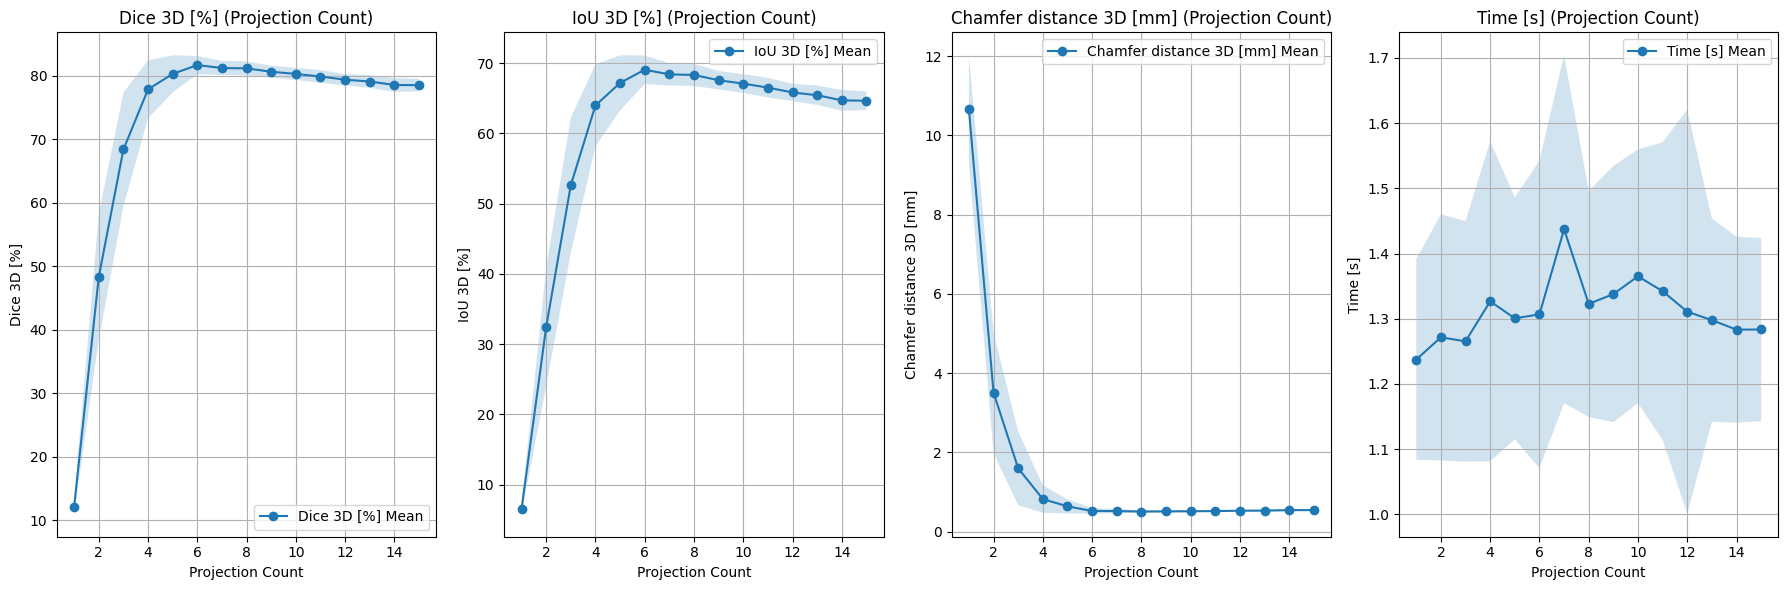

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

for i, metric in enumerate(metrics[:4]):
    mean_values = df_grouped[(metric, 'mean')]
    var_values = df_grouped[(metric, 'var')]
    axes[i].plot(df_grouped[projection_count], mean_values, label=f'{metric} Mean', marker='o')
    axes[i].fill_between(df_grouped[projection_count], 
                          mean_values - var_values**0.5, 
                          mean_values + var_values**0.5, 
                          alpha=0.2)
    axes[i].set_title(f'{metric} (Projection Count)')
    axes[i].set_xlabel('Projection Count')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.savefig('figures/metric_n_projs.png')
plt.show()

## Time 

In [37]:
dv = df["Time [s]"].values
iv = df['# Projections'].values.reshape(-1, 1)

model = LinearRegression().fit(iv, dv)
dv_pred = model.predict(iv)

_, p_value = stats.ttest_1samp(dv - dv_pred, 0)
p_value, model.coef_[0]

(np.float64(0.9999999999999909), np.float64(0.002264072256428861))

np.float64(0.002264072256428861)